In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np
%matplotlib notebook
import matplotlib as mpl
mpl.get_backend()

'nbAgg'

In [2]:
weather= pd.read_csv('weather.csv')

In [3]:
weather

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [4]:
weather=weather.dropna() #removing any missing value

In [5]:
weather

,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106
...,...,...,...,...
165080,USC00205822,2015-06-09,TMAX,256
165081,USC00205822,2009-10-06,TMAX,167
165082,USC00205050,2014-07-14,TMAX,283
165083,USC00200230,2006-11-29,TMIN,117


In [6]:
weather['Date']= pd.DatetimeIndex(weather['Date']).date

In [7]:
#leap year.
ly=['2922008','2922012'] #list of 29 feb in the data.
Dates = [datetime.datetime.strptime(i, '%d%m%Y').date() for i in ly]
weather= weather[~weather['Date'].isin(Dates)]

In [8]:
#create for month 
weather['Month']=pd.DatetimeIndex(weather['Date']).month

/home/chu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [9]:
weather.head(10)

,ID,Date,Element,Data_Value,Month
0,USW00094889,2014-11-12,TMAX,22,11
1,USC00208972,2009-04-29,TMIN,56,4
2,USC00200032,2008-05-26,TMAX,278,5
3,USC00205563,2005-11-11,TMAX,139,11
4,USC00200230,2014-02-27,TMAX,-106,2
5,USW00014833,2010-10-01,TMAX,194,10
6,USC00207308,2010-06-29,TMIN,144,6
7,USC00203712,2005-10-04,TMAX,289,10
8,USW00004848,2007-12-14,TMIN,-16,12
9,USC00200220,2011-04-21,TMAX,72,4


In [10]:
#cutoff
a='31122014'
cutoff_date = datetime.datetime.strptime(a,'%d%m%Y').date()

In [11]:
weather1= weather[weather['Date']<= cutoff_date]
weather2= weather[weather['Date'] > cutoff_date]

In [12]:
weather1

,ID,Date,Element,Data_Value,Month
0,USW00094889,2014-11-12,TMAX,22,11
1,USC00208972,2009-04-29,TMIN,56,4
2,USC00200032,2008-05-26,TMAX,278,5
3,USC00205563,2005-11-11,TMAX,139,11
4,USC00200230,2014-02-27,TMAX,-106,2
...,...,...,...,...,...
165079,USC00202308,2005-03-02,TMIN,-67,3
165081,USC00205822,2009-10-06,TMAX,167,10
165082,USC00205050,2014-07-14,TMAX,283,7
165083,USC00200230,2006-11-29,TMIN,117,11


In [13]:
w_min = weather1[weather1['Element'] =='TMIN'].groupby('Month').aggregate({'Data_Value':np.min}) #grouping by minimum temp.
w_max = weather1[weather1['Element'] == 'TMAX'].groupby('Month').aggregate({'Data_Value':np.max}) #grouping by maximum temp.

<IPython.core.display.Javascript object>


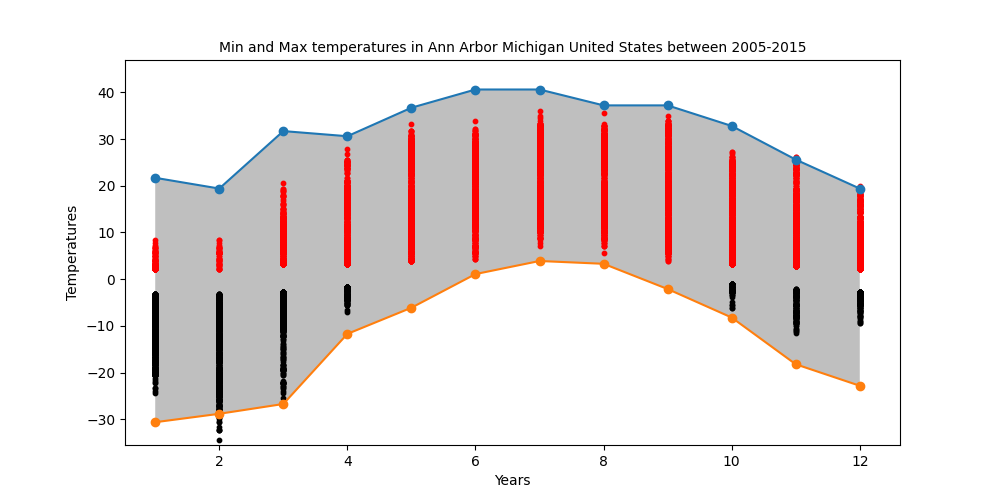

In [19]:
plt.figure()
plt.plot(w_max, '-o', w_min, '-o')

In [20]:
plt.gca()
x = w_max.index.values
plt.gca().fill_between(x, w_min.values.flatten(), w_max.values.flatten(), facecolor='grey',alpha=0.5)

In [21]:
#using scatterplot for superimposing on the plot
w1_max = weather2[weather2['Data_Value'] > weather2['Month'].map(w_max['Data_Value'])]
w1_min = weather2[weather2['Data_Value'] < weather2['Month'].map(w_min['Data_Value'])]
w_max['Data_Value'] = w_max.loc[:,'Data_Value']/10
w_min['Data_Value'] = w_min.loc[:,'Data_Value']/10
w1_min['Data_Value'] = w1_min.loc[:,'Data_Value']/10
w1_max['Data_Value'] = w1_max.loc[:,'Data_Value']/10
plt.gca().scatter(w1_max.Month.tolist(), w1_max['Data_Value'], s=10, c='red') #values over max
plt.gca().scatter(w1_min.Month.tolist(), w1_min['Data_Value'], s=10, c='black') #values under min



/home/chu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/chu/.local/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [17]:
plt.xticks(list(w_max.index),['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])         

([<matplotlib.axis.XTick at 0x7f5616aa6b00>,
 [Text(1, 0, 'Jan'),
  Text(2, 0, 'Feb'),
  Text(3, 0, 'Mar'),
  Text(4, 0, 'Apr'),
  Text(5, 0, 'May'),
  Text(6, 0, 'Jun'),
  Text(7, 0, 'Jul'),
  Text(8, 0, 'Aug'),
  Text(9, 0, 'Sept'),
  Text(10, 0, 'Oct'),
  Text(11, 0, 'Nov'),
  Text(12, 0, 'Dec')])

In [30]:
plt.title('Min and Max temperatures in Ann Arbor Michigan United States between 2005-2015', fontsize=10)
plt.xlabel('Years', fontsize=10)
plt.ylabel('Temperatures', fontsize=10)
fig = plt.gcf()
fig.set_size_inches(10,5)
plt.tick_params(labelsize=10)
plt.show()